<a id = 'home'></a>
# Spooky Author Idenification EDA


[Kaggle Competition Home](https://www.kaggle.com/c/spooky-author-identification)

This project details my EDA for the NLP Kaggle compeition 'Spooky Authors'.  The goal of the competition is to predict which of three authors from a similar genre and era (Edgar Allan Poe, Mary W. Shelley, and H.P. Lovecraft) is the author of a particular sentence.

## Table of Contents
- [Project Home](#home)
- [Libary Imports](#libraries)
- [EDA](#eda)
    - [Word Usage by Author](#most-common-words)

<a id = 'libraries'></a>
## Libary Import

In [130]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#plotting customizations
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.style.use('fivethirtyeight')
# 538 colors ['008fd5', 'fc4f30', 'e5ae38', '6d904f', '8b8b8b', '810f7c']

import sys
print("The Python version is %s.%s.%s" % sys.version_info[:3])
print("matplotlib version: {}".format(matplotlib.__version__))
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))

The Python version is 3.6.1
matplotlib version: 2.0.2
pandas version: 0.20.1
numpy version: 1.12.1


<a id = 'data'></a>

## Load the Data

[Project Home](#home)

In [5]:
df = pd.read_csv('train.csv')

Get to know the data!

In [6]:
print(df.shape)
df.head()

(19579, 3)


,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19579 entries, 0 to 19578
Data columns (total 3 columns):
id        19579 non-null object
text      19579 non-null object
author    19579 non-null object
dtypes: object(3)
memory usage: 459.0+ KB


Are there any duplicates in the dataset?

In [8]:
print(df.shape[0],df['text'].unique().__len__())


19579 19579


Nope, all the rows are unique since the number of rows in the dataframe matches up with the number of unique rows.

<a id = 'eda'></a>
## EDA
[Project Home](#home)

What is the distribution of observations across author?  Probably easiest to use a bar plot to see this.

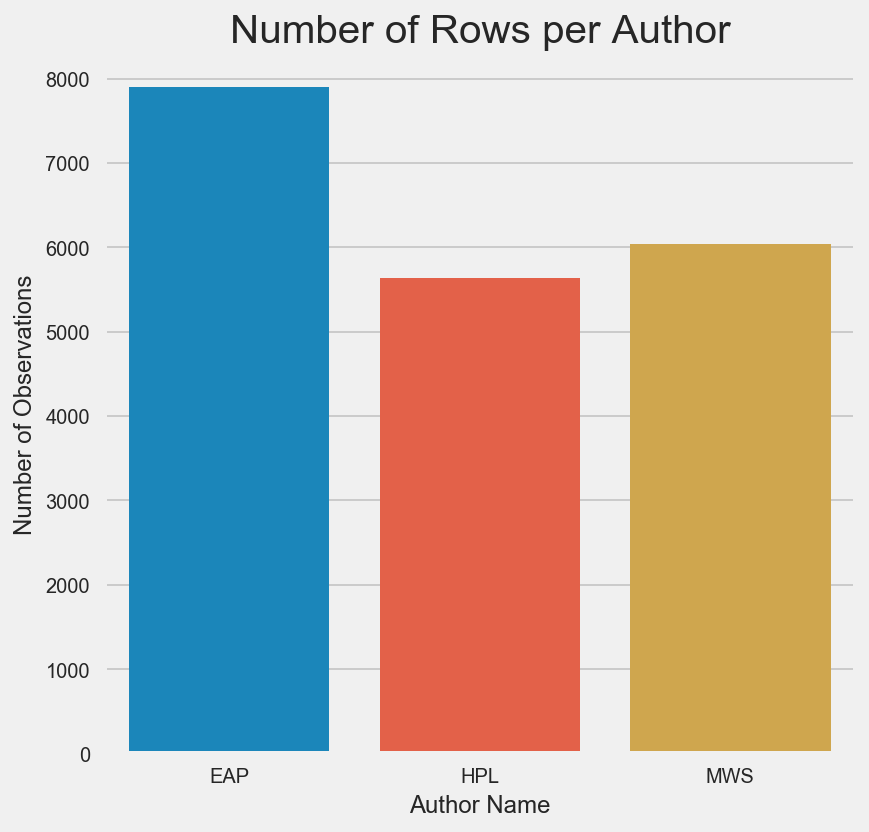

In [9]:
author_rows = pd.DataFrame(df.groupby('author')['text'].count())
author_rows.reset_index(inplace = True)
plt.figure(figsize=(6,6))
sns.barplot(author_rows['author'], author_rows['text'])
plt.ylabel('Number of Observations', fontsize=12)
plt.xlabel('Author Name', fontsize=12)
plt.title('Number of Rows per Author')
plt.show()


What about the average number of words per row per author?

In [10]:
# create a new column for word counts in each row
# then create a similar plot as to above but using average words
import re
df['word_count'] = df['text'].apply(lambda x: len(re.findall(r'\w+', x)))


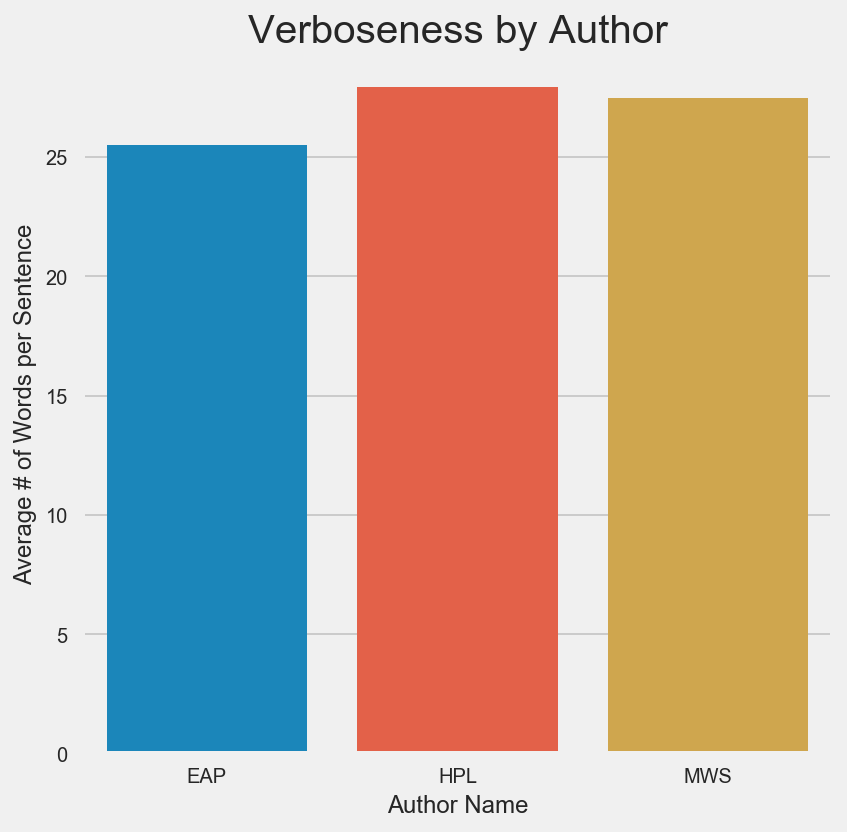

In [11]:
author_words = pd.DataFrame(df.groupby('author')['word_count'].mean())
author_words.reset_index(inplace = True)
plt.figure(figsize=(6,6))
sns.barplot(author_words['author'], author_words['word_count'])
plt.ylabel('Average # of Words per Sentence', fontsize=12)
plt.xlabel('Author Name', fontsize=12)
plt.title('Verboseness by Author')
plt.show()

<a id = 'most-common-words'></a>
### Most Common Words by Each Author

[Project Home](#home)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
def common_words(matrix, stop=None):
    """
    A function to return the most common words in a matrix.
    Inputs are:
        1) a `matrix` of text data
        2) an option for the stop_words parameter of CountVectorizer.  Defaults to `None`.
    """
    cv = CountVectorizer(stop_words = stop)
    cv.fit(matrix)
    transformed = pd.DataFrame(cv.transform(matrix).todense(),
                              columns=cv.get_feature_names())
    top_10 = transformed.sum().sort_values(ascending=False)[:10]
    print('Size:', transformed.shape)
    print('Top 10 Words:\n', transformed.sum().sort_values(ascending=False).head(10))
    return transformed, top_10


In [81]:
eap_common_words, eap_10 = common_words(df.loc[df['author'] == 'EAP','text'], stop = 'english')

Size: (7900, 14967)
Top 10 Words:
 said      356
little    275
say       267
time      260
man       257
great     227
long      212
did       204
having    187
length    178
dtype: int64


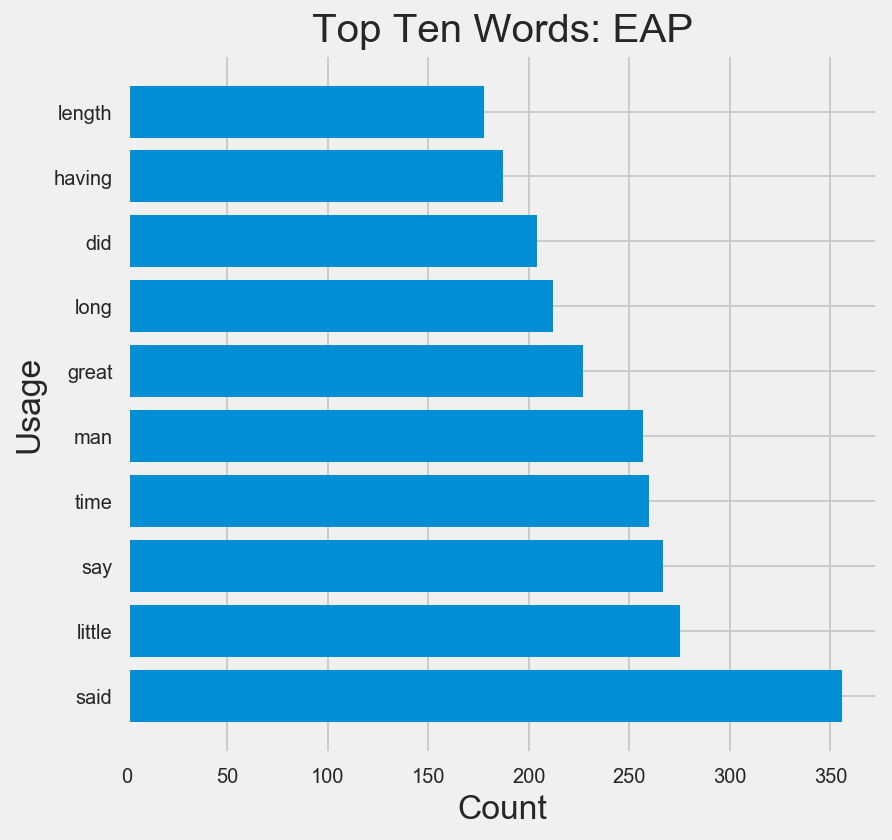

In [124]:
# generate a bar plot of the top ten words
eap_top10 = pd.DataFrame(eap_10, columns = ['counts'])
word = eap_top10.index.tolist()
words = np.arange(len(eap_top10.index))

fig = plt.figure(figsize=(6, 6))
plt.barh(np.arange(len(eap_top10.index)), eap_top10['counts'], color ='#008fd5')
plt.yticks(words, np.array(word), size=10)
plt.ylabel('Usage')
plt.xlabel('Count')
plt.title('Top Ten Words: EAP')

(-0.5, 399.5, 199.5, -0.5)

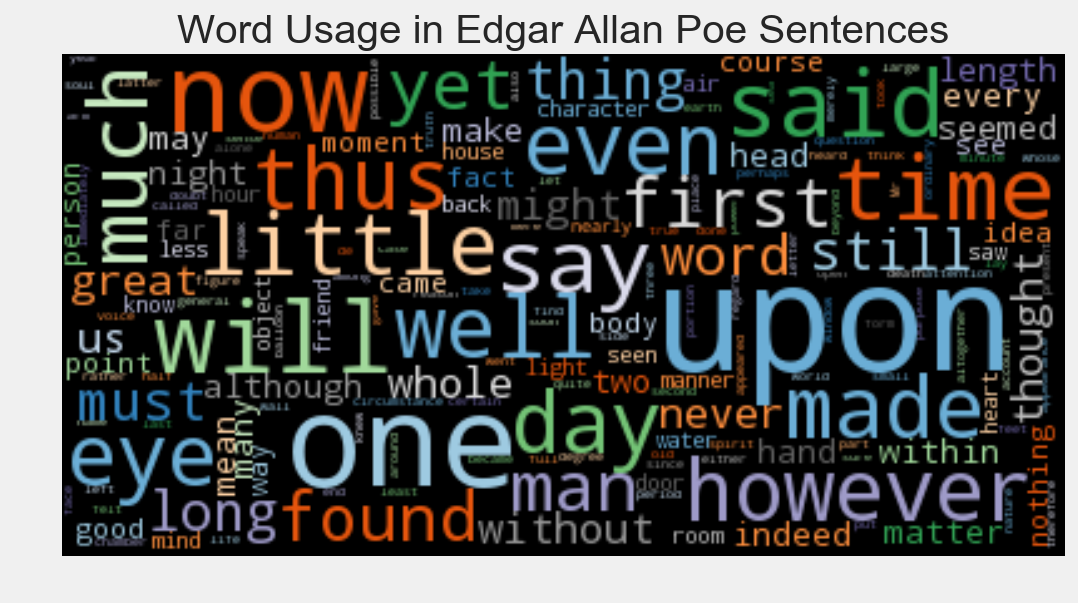

In [134]:
from wordcloud import WordCloud,STOPWORDS
import scipy
import random

# generate a word cloud for the author's 
words = ' '.join(df.loc[df['author'] == 'EAP','text'])

# generate the word cloud image
wordcloud = WordCloud(max_font_size = 60,
                      stopwords = STOPWORDS,
                      colormap = "tab20c", # change color option here
                      background_color='black').generate(words) #change background color here

# display the generated image
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Usage in Edgar Allan Poe Sentences')
plt.axis("off")

In [84]:
mws_common_words, mws_top10 = common_words(df.loc[df['author'] == 'MWS','text'], stop = 'english')

Size: (6044, 11235)
Top 10 Words:
 life       334
love       274
raymond    270
heart      265
eyes       243
man        242
did        233
time       232
said       208
day        206
dtype: int64


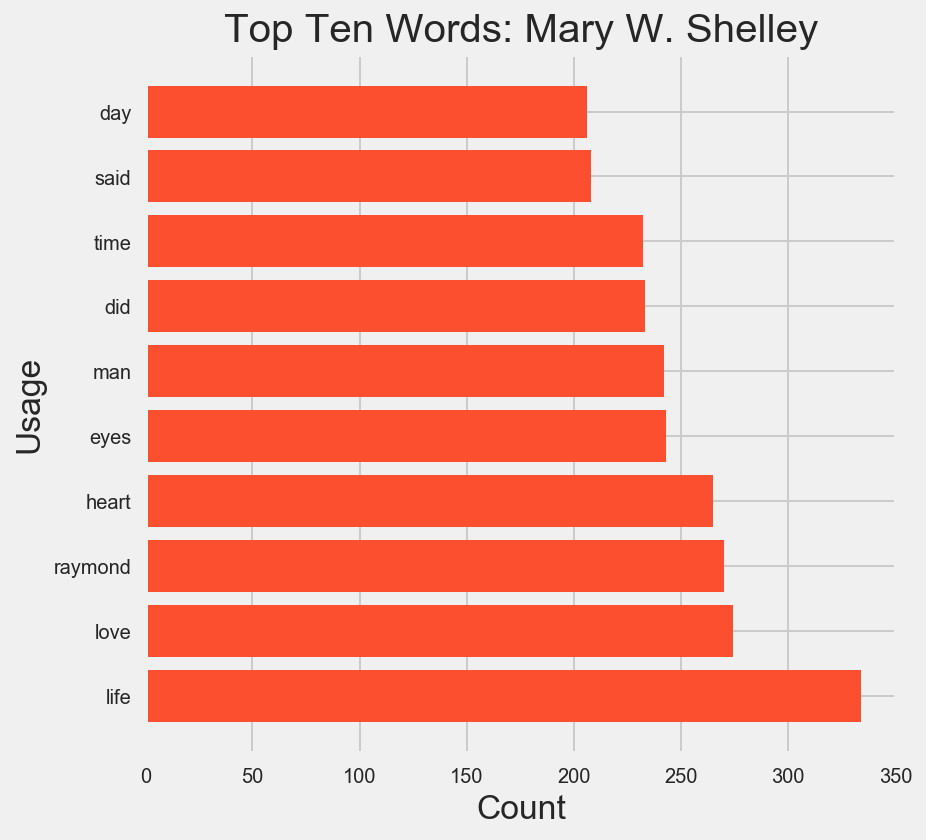

In [125]:
# generate a bar plot of the top ten words
mws_top10 = pd.DataFrame(mws_top10, columns = ['counts'])
word = mws_top10.index.tolist()
words = np.arange(len(mws_top10.index))

fig = plt.figure(figsize=(6, 6))
plt.barh(np.arange(len(mws_top10.index)), mws_top10['counts'], color = '#fc4f30')
plt.yticks(words, np.array(word), size=10)
plt.ylabel('Usage')
plt.xlabel('Count')
plt.title('Top Ten Words: Mary W. Shelley')

(-0.5, 399.5, 199.5, -0.5)

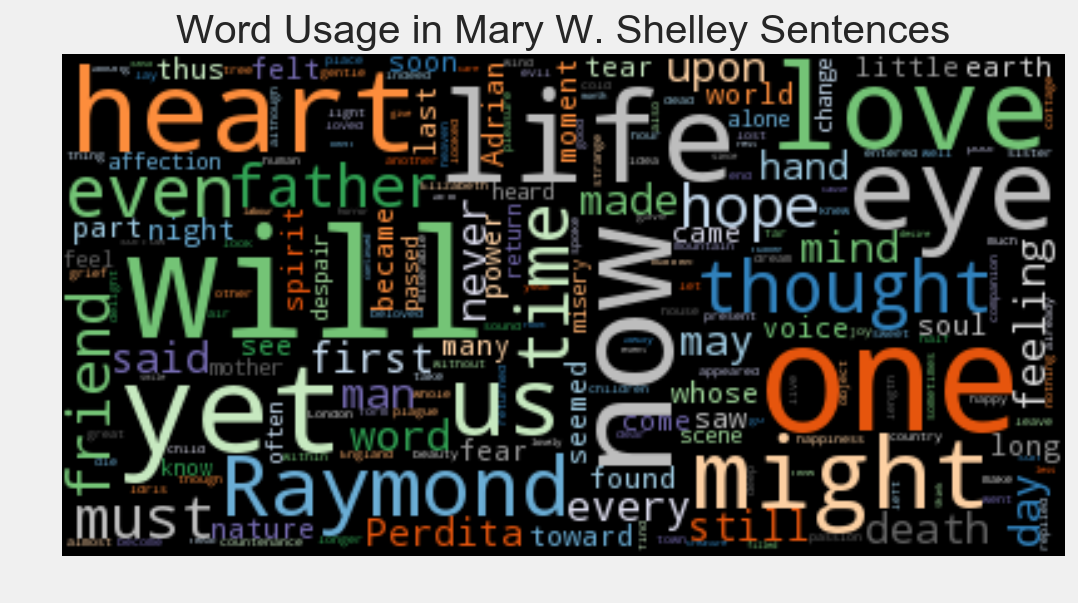

In [88]:
# generate a word cloud for the author's words
words = ' '.join(df.loc[df['author'] == 'MWS','text'])

# generate the word cloud image
wordcloud = WordCloud(max_font_size = 60,
                      stopwords = STOPWORDS,
                      colormap = "tab20c", # change color option here
                      background_color='black').generate(words) #change background color here

# display the generated image
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Usage in Mary W. Shelley Sentences')
plt.axis("off")

In [91]:
hpl_common_words, hpl_top10 = common_words(df.loc[df['author'] == 'HPL','text'], stop = 'english')

Size: (5635, 14210)
Top 10 Words:
 old       392
man       280
like      273
did       263
night     255
things    238
time      238
saw       235
came      216
men       204
dtype: int64


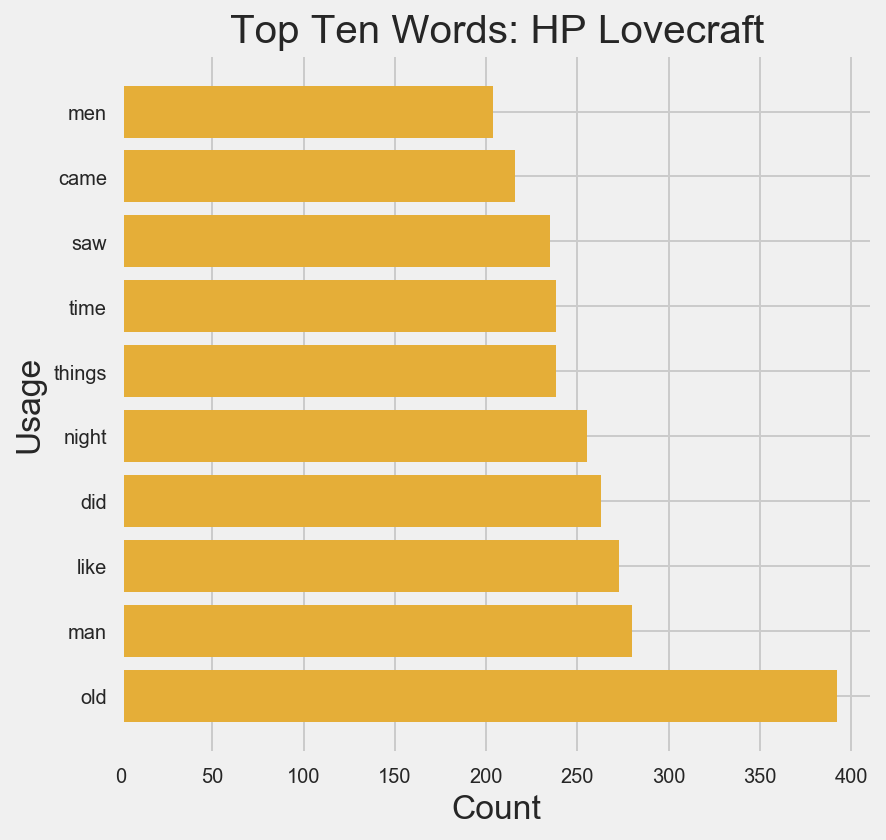

In [127]:
# generate a bar plot of the top ten words
hpl_top10 = pd.DataFrame(hpl_top10, columns = ['counts'])
word = hpl_top10.index.tolist()
words = np.arange(len(hpl_top10.index))

fig = plt.figure(figsize=(6, 6))
plt.barh(np.arange(len(hpl_top10.index)), hpl_top10['counts'], color ='#e5ae38')
plt.yticks(words, np.array(word), size=10)
plt.ylabel('Usage')
plt.xlabel('Count')
plt.title('Top Ten Words: HP Lovecraft')

(-0.5, 399.5, 199.5, -0.5)

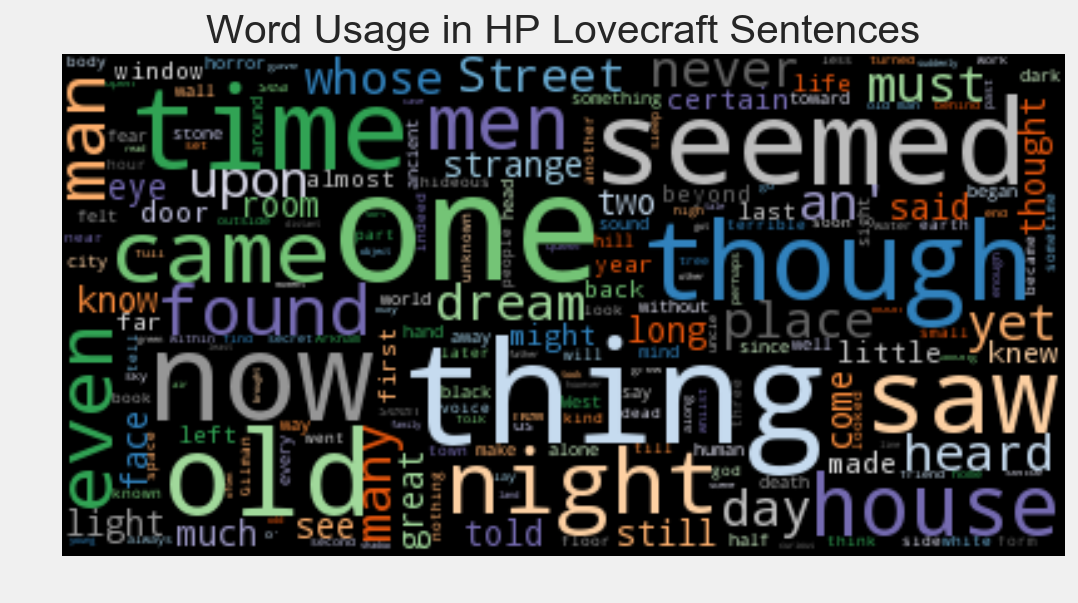

In [93]:
# try doing a word cloud
words = ' '.join(df.loc[df['author'] == 'HPL','text'])

# generate the word cloud image
wordcloud = WordCloud(max_font_size = 60,
                      stopwords = STOPWORDS,
                      colormap = "tab20c", # change color option here
                      background_color='black').generate(words) #change background color here

# display the generated image
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Usage in HP Lovecraft Sentences')
plt.axis("off")
